In [ ]:
# Colab 한글 깨짐 해결 위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

In [1]:
# matplotlib 설정
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Ada Boost

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   test_size = 0.3,
                                                   shuffle = True)

In [17]:
model_ada = AdaBoostClassifier(n_estimators=9, algorithm='SAMME.R',
                              learning_rate=0.5).fit(X_train, y_train)

#### 에이다 부스트의 파라미터
  - base_estimator : 모델을 정해주는 파라미터이다. 값을 지정해주지 않으면 기본값으로 DecisionTreeClassifier(max_depth=1)로 설정된다.
  - learning_rate : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 설정한다. 클수록 보정을 강하게 한다, 기본값은 1.0

- algorithm : 사이킷런에서 제공하는 에이다 부스트는 SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function)이라는 알고리즘으로 구현되어 있다. 기본값은 SAMME.R(R은 Real) 이다.
  - SAMME는 AdaBoost와 알고리즘은 유사하다. 다만 n번째 모델의 가중치를 구하는 부분만 AdaBoost와 다른 수식을 가진다. 만약 클래스의 수가 2인 이중 분류의 경우에는 SAMME는 AdaBoost와 동일한 알고리즘이 된다. SAMME.R은 모델의 예측값을 이용하는게 아니라 클래스의 확률을 기반으로 한다.

In [18]:
model_ada.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=992550093),
 DecisionTreeClassifier(max_depth=1, random_state=1415672402),
 DecisionTreeClassifier(max_depth=1, random_state=2146867988),
 DecisionTreeClassifier(max_depth=1, random_state=479585659),
 DecisionTreeClassifier(max_depth=1, random_state=574414900),
 DecisionTreeClassifier(max_depth=1, random_state=605371518),
 DecisionTreeClassifier(max_depth=1, random_state=534916925),
 DecisionTreeClassifier(max_depth=1, random_state=1142847218),
 DecisionTreeClassifier(max_depth=1, random_state=1991474904)]

- 랜덤 포레스트와 같이 에이다 부스트의 예측기들은 estimators_에 저장된다.

In [19]:
def draw_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

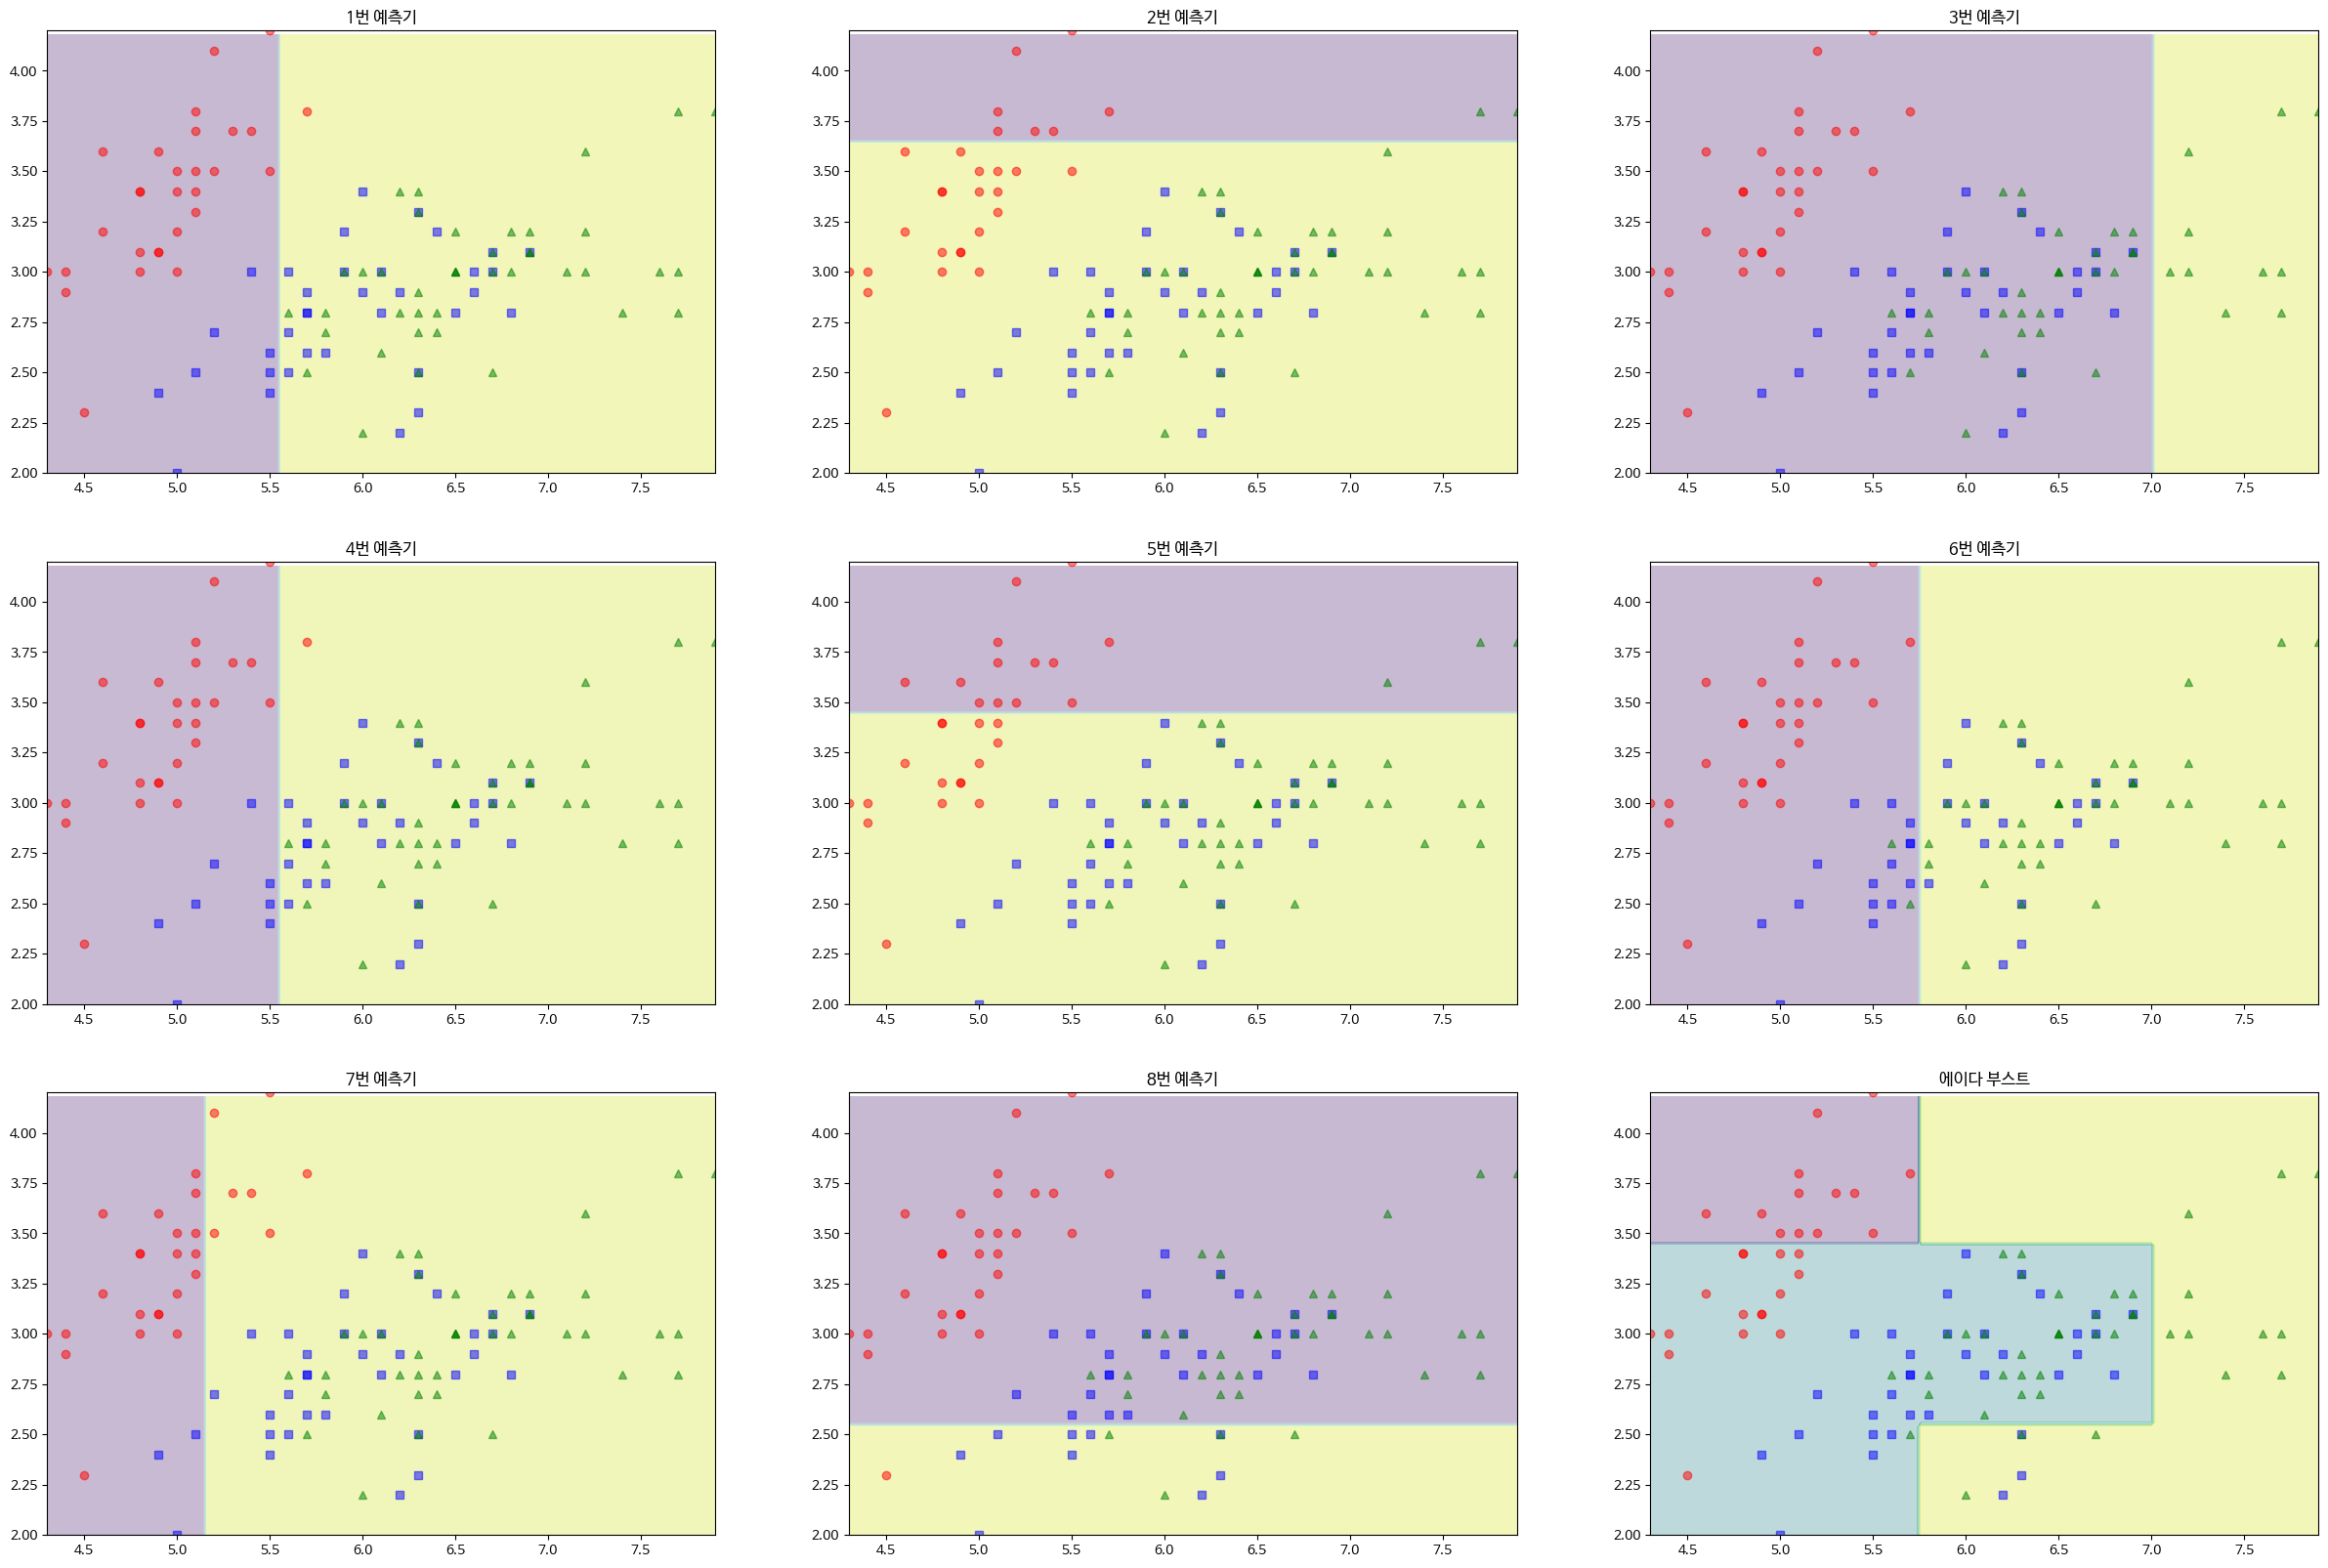

In [20]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(model_ada.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(model_ada.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(model_ada.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(model_ada.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(model_ada.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(model_ada.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(model_ada.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(model_ada.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(model_ada, X_train, y_train)

- 에이다 부스트는 깊이가 1인 결정트리를 사용한다. 깊이가 1이기 때문에 경계선이 하나만 표시 되어있다. 앙상블된 모델역시 경계선이 단순하게 그려져있다.

In [21]:
model_ada.predict_proba(X_test)[:6]

array([[1.83340423e-01, 8.16641089e-01, 1.84876188e-05],
       [1.83340423e-01, 8.16641089e-01, 1.84876188e-05],
       [1.15926654e-04, 5.36599144e-01, 4.63284929e-01],
       [1.83340423e-01, 8.16641089e-01, 1.84876188e-05],
       [1.83340423e-01, 8.16641089e-01, 1.84876188e-05],
       [9.99996198e-01, 3.37987423e-06, 4.21701717e-07]])

- algorithm이 SAMME.R인 경우에는 predict_proba를 이용해 각 클래스의 확률을 알 수 있다.

In [22]:
model_ada.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1,
       1])

- 예측 결과와 클래스의 확률을 비교해보자.

In [23]:
print('SAMME.R의 train score : {}'.format(model_ada.score(X_train, y_train)))
print('SAMME.R의 test score : {}'.format(model_ada.score(X_test, y_test)))

SAMME.R의 train score : 0.5523809523809524
SAMME.R의 test score : 0.5333333333333333


In [14]:
ada_samme = AdaBoostClassifier(n_estimators=9, algorithm='SAMME',
                              learning_rate=0.5).fit(X_train, y_train)

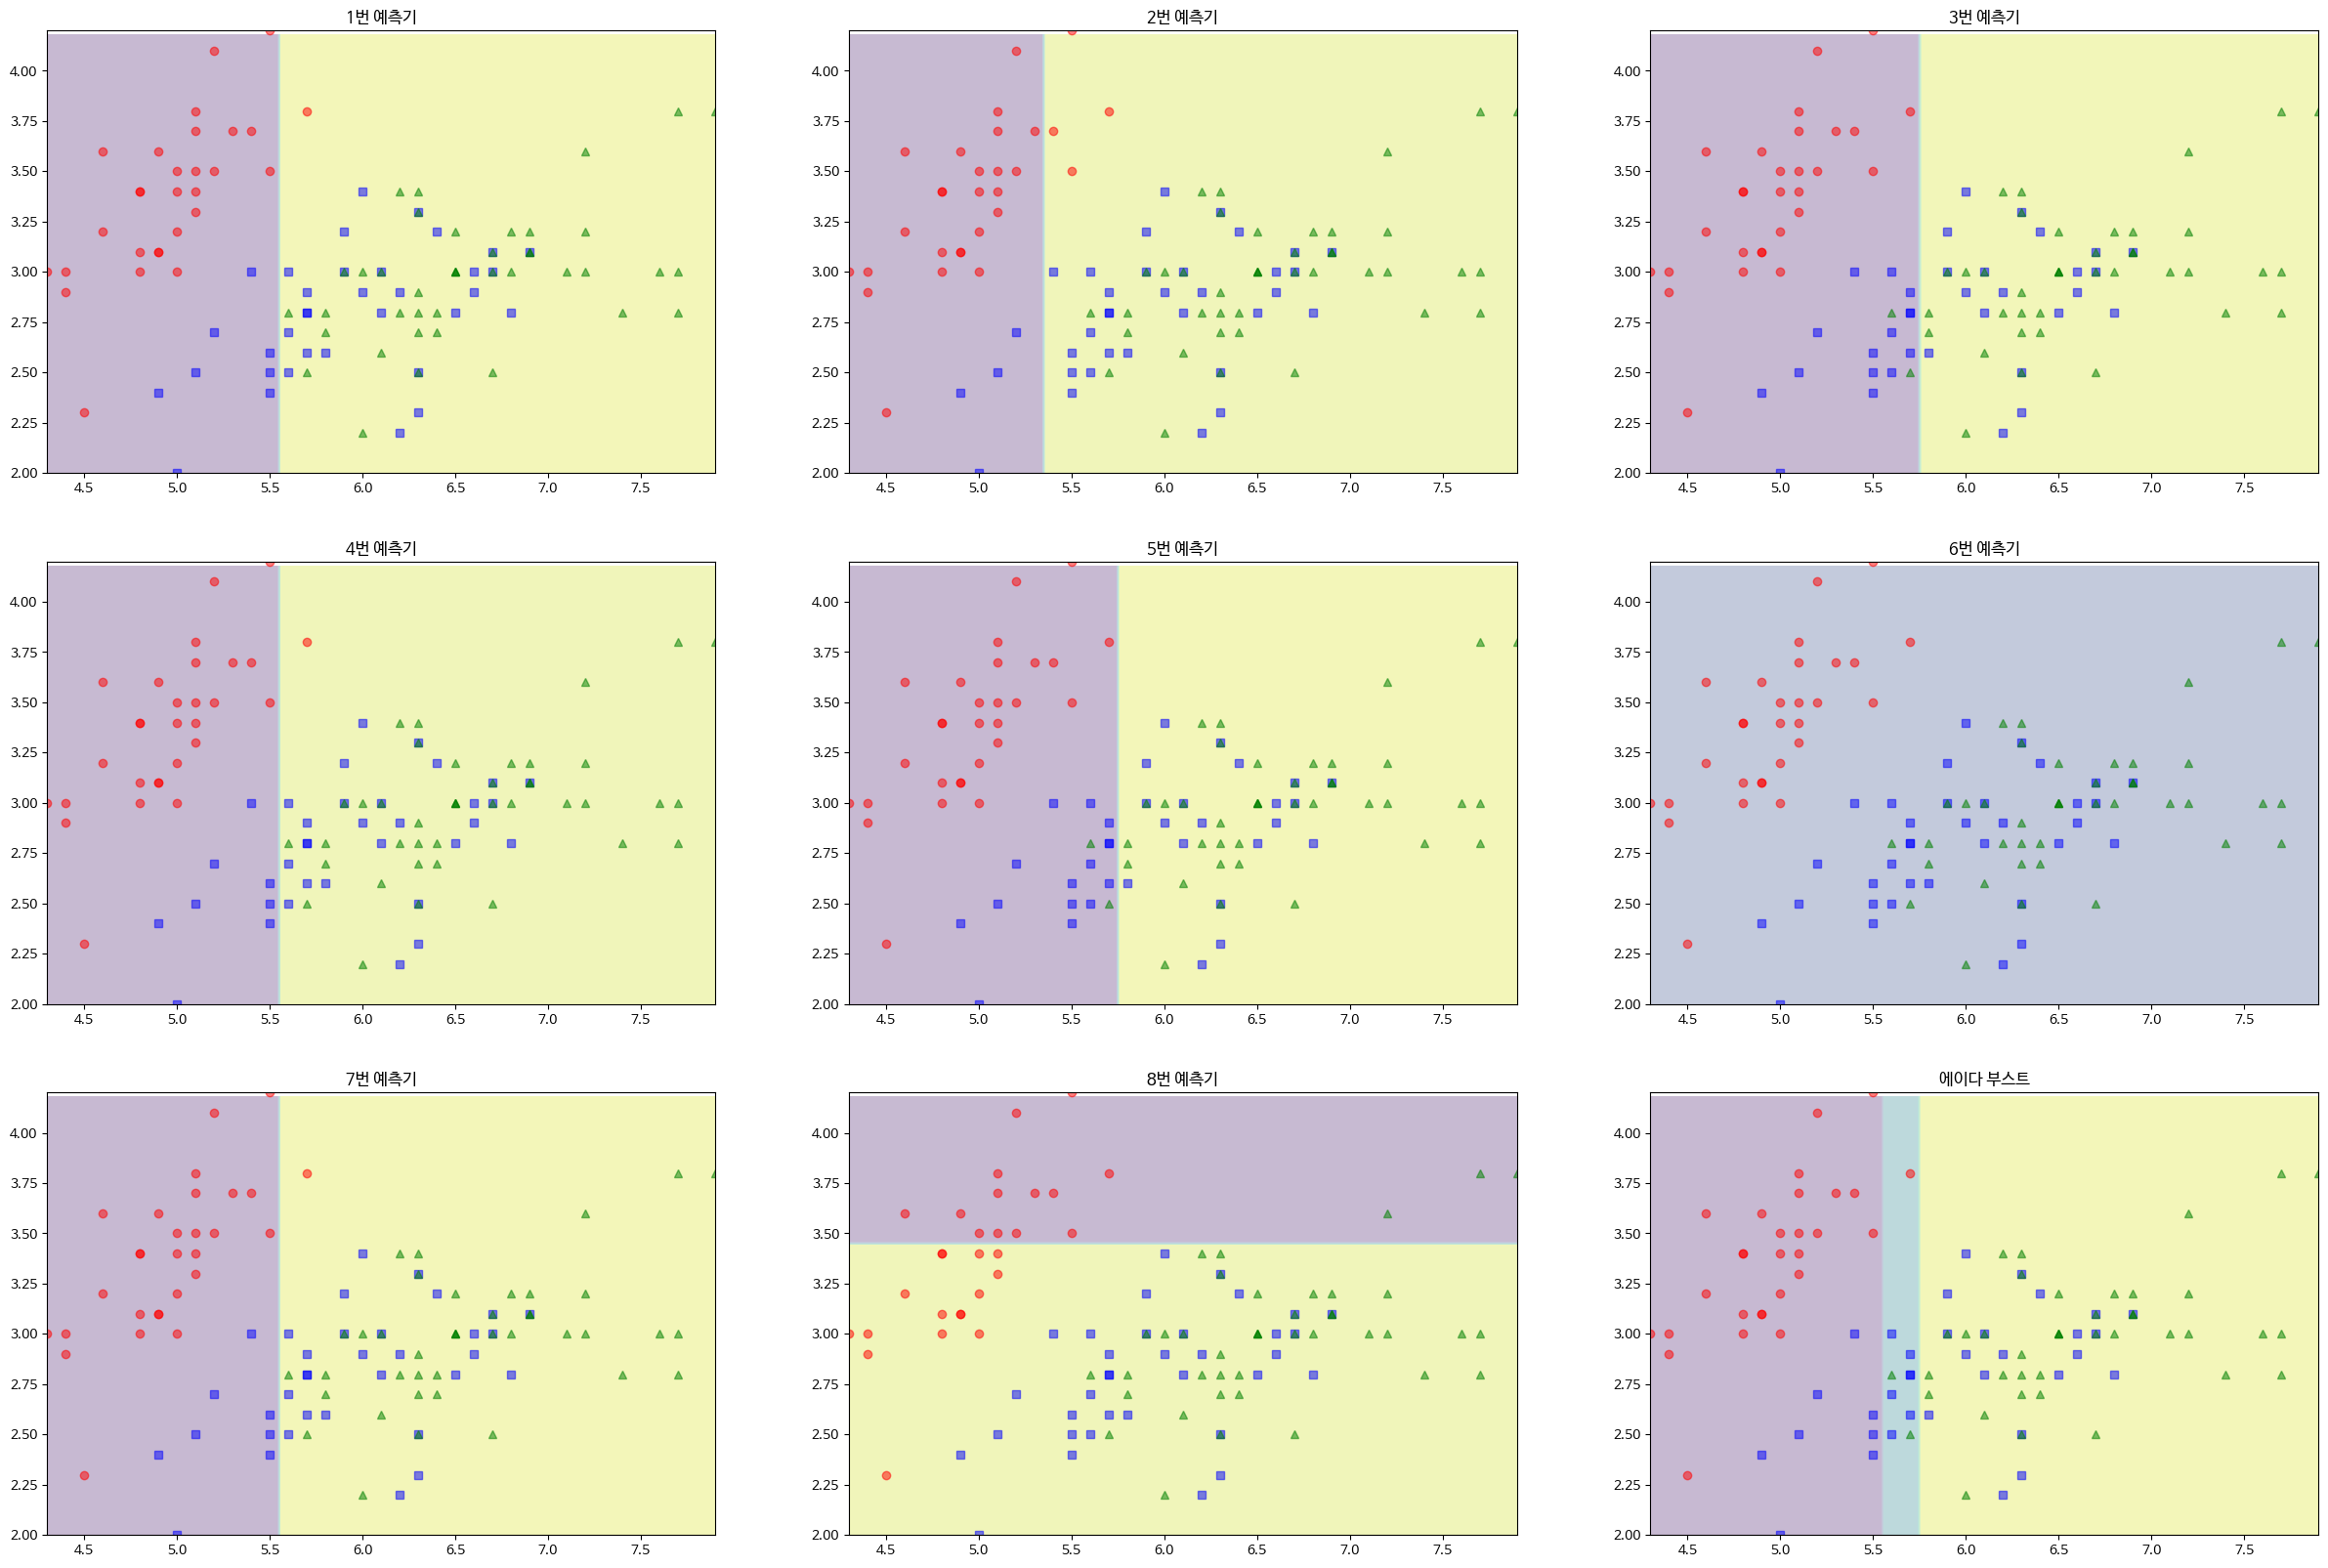

In [15]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(ada_samme.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(ada_samme.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(ada_samme.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(ada_samme.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(ada_samme.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(ada_samme.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(ada_samme.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(ada_samme.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(ada_samme, X_train, y_train)

In [16]:
print('SAMME의 train score : {}'.format(ada_samme.score(X_train, y_train)))
print('SAMME의 test score : {}'.format(ada_samme.score(X_test, y_test)))

SAMME의 train score : 0.7047619047619048
SAMME의 test score : 0.6666666666666666


In [ ]:
ada_samme.predict_proba(X_test)

- SAMME보다는 SAMME.R을 이용한 에이다부스트 모델이 성능이 더 높게 나오는 것을 확인할 수 있다.

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2,
                                                   shuffle = True)

randf = RandomForestClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)

ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.5).fit(X_train, y_train)

In [26]:
randf.feature_importances_

array([0.04614302, 0.01978397, 0.08414746, 0.03217919, 0.0055772 ,
       0.01802096, 0.07838427, 0.08764722, 0.00393484, 0.00482372,
       0.01941633, 0.00484166, 0.00540545, 0.03502522, 0.00374506,
       0.00399115, 0.00602632, 0.00240207, 0.00377915, 0.00464553,
       0.0971376 , 0.02484077, 0.09705479, 0.09272208, 0.01045025,
       0.01504841, 0.05095895, 0.13029987, 0.00796401, 0.00360347])

In [27]:
ada.feature_importances_

array([0.  , 0.1 , 0.  , 0.  , 0.02, 0.04, 0.02, 0.02, 0.02, 0.  , 0.04,
       0.  , 0.  , 0.06, 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.02, 0.1 ,
       0.14, 0.08, 0.06, 0.  , 0.1 , 0.06, 0.06, 0.  ])

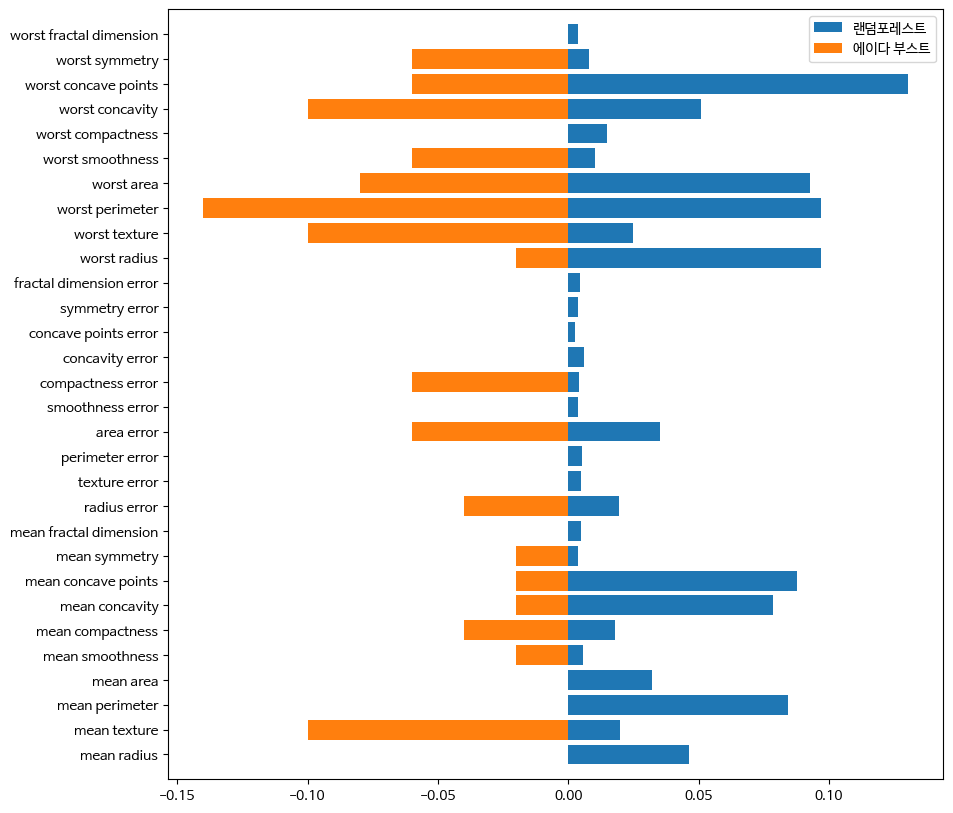

In [28]:
plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y1 = randf.feature_importances_
Y2 = ada.feature_importances_
plt.barh(X, Y1)
plt.barh(X, -Y2)
plt.yticks(X, cancer.feature_names)
plt.ylim(-1, cancer.data.shape[1])
plt.legend(['랜덤포레스트', '에이다 부스트'])
plt.show()

- 에이다 부스트와 랜덤포레스트의 특성 중요도를 비교해 보았다.
- 0의 값을 가진 특성들도 있고 다른 모델에서는 중요하게 생각하지 않은 특성을 오히려 중요하게 보는 경우도 있다.